In [4]:
ls

 BBL.ipynb
 calculate_energy_levels.py
 CATS_data/
 compare_barotropic_calculations.py
 ctd_cast.py
 data/
 Diffusivity.ipynb
 figures/
'first Try of a Diffusivity calculation.ipynb'
 gm_library.py
 helper_functions.py
 Krho_calculation_new.png
 K_rho_fig.pkl
 list_of_moorings.pkl
 load_temperature_into_data_frames.py
 load_velocity_into_data_frames.py
 location.py
 map_CTD_locations.png
'Method Documentation Energy Level from Spectra.ipynb'
 mooring.py
 plot_energy_levels.py
'prepare CATS model data.ipynb'
 __pycache__/
 PyTMD_test.ipynb
'Systematic Error Search.ipynb'
 ttide_method/


In [5]:
import numpy as np
import scipy.io as sio
import helper_functions as help
import datetime as dt
import pandas as pd

In [6]:
def get_filepaths_from_directory(directory = "/media/sf_VM_Folder/data", inclusive = "", exclusive = ()):

    #endswith method requires string or tuple of strings
    if type(inclusive) is not str and type(inclusive) is not tuple:
        inclusive = tuple(inclusive)
    if not type(inclusive) is not str and type(inclusive) is not tuple:
        exclusive = tuple(exclusive)

    def all_files(folder):
        import os
        for path, dirs, files in os.walk(folder):
            for f in files:
                yield os.path.join(path, f)

    list_of_files = [f for f in all_files(directory)]

    return [f for f in list_of_files if f.endswith(inclusive) and not f.endswith(exclusive)]

In [7]:
DIRECTORY = "./CATS_data"

In [8]:
paths = sorted(get_filepaths_from_directory(DIRECTORY, inclusive = (".mat",), exclusive = ".model.out"))
for path in paths:
    print(path)

./CATS_data/u1.mat
./CATS_data/u2.mat
./CATS_data/u3.mat
./CATS_data/u4.mat
./CATS_data/u5.mat
./CATS_data/u6.mat
./CATS_data/u7.mat
./CATS_data/v1.mat
./CATS_data/v2.mat
./CATS_data/v3.mat
./CATS_data/v4.mat
./CATS_data/v5.mat
./CATS_data/v6.mat
./CATS_data/v7.mat


In [9]:
cats = pd.DataFrame()

lats = []
lons = []
barotropic = []

for upath, vpath in zip(paths[:7],paths[7:]):
    
    u_data = sio.loadmat(upath) 
    u = u_data["TimeSeries"][0] #in units of cm/s
    u_time_as_strings = u_data["Time"]
    read_in_lat = u_data["lat"][0][0]
    read_in_lon = u_data["lon"][0][0]

    v_data = sio.loadmat(vpath) 
    v = v_data["TimeSeries"][0] #in units of cm/s
    v_time_as_strings = v_data["Time"]
    assert read_in_lat == v_data["lat"][0][0]
    assert read_in_lon == v_data["lon"][0][0]

    #Check if u and v share the same timestamps  
    assert np.all(u_time_as_strings == v_time_as_strings) 

    #converts the first 4 values from bytes into strings, joins them and parses them to a datetime object 
    time = np.asarray([dt.datetime.strptime(string, '%d-%b-%Y %H:%M:%S') for string in u_time_as_strings])

    #convert to m/s
    u = u/100
    v = v/100

    cv = u+1j*v
    
    if "time" not in cats.columns:
        cats["time"] = time
        cats.set_index("time")
    else:
        assert np.all(time == cats["time"])
    
    cats[(read_in_lat,read_in_lon)]= cv
    
    if read_in_lat not in lats: lats.append(read_in_lat)
    if read_in_lon not in lons: lons.append(read_in_lon)

In [10]:
cats

,time,"(-63.4, -52.28)","(-63.51, -51.64)","(-63.66, -50.81)","(-63.78, -50.09)","(-63.92, -49.27)","(-64.01, -48.38)","(-64.22, -47.49)"
0,2017-01-25 00:00:00,-0.144710+0.037970j,-0.037595+0.075402j,-0.012132+0.054973j,-0.010797+0.042936j,-0.007420+0.031157j,-0.008529+0.023402j,-0.007474+0.016608j
1,2017-01-25 01:00:00,-0.124351-0.015638j,-0.029557+0.053391j,-0.006571+0.041991j,-0.007679+0.032776j,-0.004884+0.024255j,-0.006410+0.018159j,-0.005970+0.012541j
2,2017-01-25 02:00:00,-0.092495-0.067004j,-0.018965+0.027961j,-0.000986+0.026336j,-0.004500+0.020619j,-0.002726+0.015913j,-0.004654+0.011954j,-0.004968+0.007873j
3,2017-01-25 03:00:00,-0.052747-0.108082j,-0.006844+0.003871j,0.004315+0.011192j,-0.001361+0.009173j,-0.000857+0.008194j,-0.003125+0.006412j,-0.004137+0.003912j
4,2017-01-25 04:00:00,-0.009736-0.132998j,0.005601-0.014986j,0.009144-0.000833j,0.001733+0.000596j,0.000964+0.002719j,-0.001514+0.002765j,-0.002983+0.001627j
...,...,...,...,...,...,...,...,...
26995,2020-02-23 18:59:59,0.027606+0.020609j,-0.002436-0.035469j,-0.014904-0.030923j,-0.010771-0.028254j,-0.013016-0.024334j,-0.012285-0.020498j,-0.014872-0.016995j
26996,2020-02-23 19:59:59,0.002989+0.071362j,-0.009101+0.003499j,-0.018444-0.003557j,-0.013824-0.004929j,-0.015740-0.006166j,-0.015764-0.005643j,-0.017574-0.005330j
26997,2020-02-23 20:59:59,-0.026499+0.117704j,-0.015679+0.043289j,-0.019556+0.024727j,-0.014678+0.019173j,-0.015602+0.012709j,-0.016131+0.009589j,-0.016752+0.006696j
26998,2020-02-23 21:59:59,-0.056929+0.148419j,-0.021336+0.075703j,-0.018262+0.048166j,-0.013421+0.038999j,-0.012918+0.028266j,-0.013666+0.021923j,-0.013001+0.016425j


In [11]:
cats.iloc[:,1].to_numpy()

array([-0.14470984+0.03797044j, -0.12435118-0.01563825j,
       -0.09249512-0.06700447j, ..., -0.02649942+0.11770411j,
       -0.05692933+0.14841868j, -0.08352728+0.15537968j])

In [12]:
cats.to_pickle("./cats_data.pickle")

/home/ole/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: >

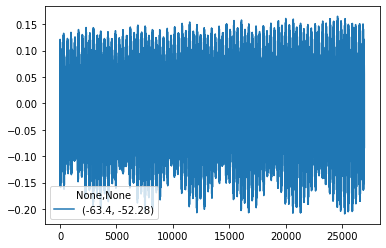

In [13]:
cats.plot(y = (-63.4, -52.28), use_index = True)

# Calculate barotropic energies

In [20]:
cats.loc[:, cats.columns!='time'].var()

(-63.4, -52.28)     0.012530
(-63.51, -51.64)    0.002918
(-63.66, -50.81)    0.001378
(-63.78, -50.09)    0.000891
(-63.92, -49.27)    0.000565
(-64.01, -48.38)    0.000413
(-64.22, -47.49)    0.000308
dtype: float64

In [21]:
barotropic = cats.loc[:, cats.columns!='time'].abs().pow(2).mean()
barotropic

(-63.4, -52.28)     0.012529
(-63.51, -51.64)    0.002918
(-63.66, -50.81)    0.001378
(-63.78, -50.09)    0.000891
(-63.92, -49.27)    0.000565
(-64.01, -48.38)    0.000413
(-64.22, -47.49)    0.000308
dtype: float64

In [16]:
type(barotropic)

pandas.core.series.Series

In [17]:
barotropic = cats.loc[:, cats.columns!='time'].mean()
barotropic

(-63.4, -52.28)     1.162710e-05-1.250095e-05j
(-63.51, -51.64)    3.739993e-06-6.228895e-06j
(-63.66, -50.81)    1.574625e-06-2.616550e-06j
(-63.78, -50.09)    1.186877e-07-9.799447e-07j
(-63.92, -49.27)    2.493600e-07-8.820109e-07j
(-64.01, -48.38)    6.642715e-07-5.585486e-07j
(-64.22, -47.49)    5.418933e-07+1.224484e-08j
dtype: complex128

/home/ole/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: >

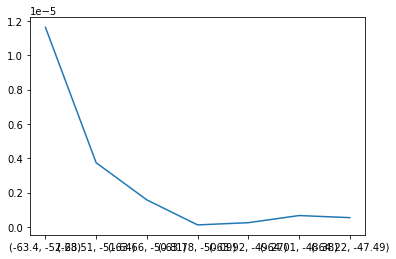

In [18]:
barotropic.plot()

In [ ]:
barotropic.to_pickle("./cats_barotropic_energies.pickle")